In [1]:
# OBSERVATIONS AND INSIGHTS
# 1. The drug regimen with the lowest standard deviation of tumor volume was Ramicane (4.85), suggesting
#    it to be the most reliable. Whereas Ketapril had the highest standard deviation (8.28), suggesting it
#    to be to be the least relaible.

# 2. The data used consisted of 49% female, and 51% male mice. 
#    This tells us that the data used was realiable in regards to sex.

# 3. The correlation between mouse weight and average tumor volume is 0.84. 
#    This shows us that there is a strong, posotive correlation between weight and the and the average tumour volume. 

# Dependancies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Data/Mouse_metadata.csv"
study_results_path = "Data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Display the data table for preview
data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_total = data['Mouse ID'].value_counts()
len(mouse_total)

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = data[data.duplicated(subset=['Mouse ID','Timepoint'])]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = data.set_index('Mouse ID')
duplicate_data.loc['g989']

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_data = duplicate_data.drop(['g989'])
clean_data = duplicate_data.reset_index()
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_total = clean_data['Mouse ID'].value_counts()
len(clean_mouse_total)

248

In [7]:
# SUMMARY STATISTICS

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = clean_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = clean_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance = clean_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
standard_dev = clean_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem = clean_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

data = {'Mean Tumor Volume' : mean,
        'Median Tumor Volume' : median,
        'Tumor Volume Variance' : variance,
        'Tumor Volume Std. Dev.' : standard_dev,
        'Tumor Volume Std. Err.' : sem}

data_summary = pd.DataFrame(data)
data_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Using the aggregation method, produce the same summary statistics in a single line
data_sort_2 = clean_data.groupby('Drug Regimen')
data_summary_2 = data_sort_2.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
data_summary_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Text(0, 0.5, 'Number of Mice Tested')

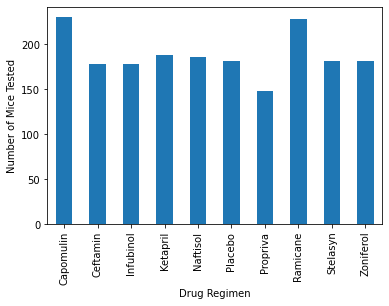

In [9]:
# BAR AND PIE CHARTS

# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_data = clean_data.groupby('Drug Regimen').count()['Timepoint']
bar_frame = pd.DataFrame(bar_data)
bar_chart = bar_frame.plot.bar(legend=False)
bar_chart.set_ylabel("Number of Mice Tested")

In [28]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

Text(0, 0.5, 'Sex')

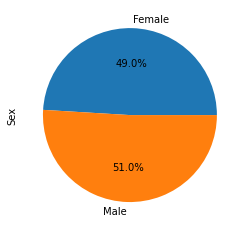

In [29]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

pie_data = clean_data.groupby('Sex').count()['Timepoint']
pie_frame = pd.DataFrame(pie_data)
pie_chart = pie_frame.plot.pie(legend=False,y='Timepoint',autopct='%1.1f%%')
pie_chart.set_ylabel("Sex")

In [12]:
# Quartiles, Outliers and Boxplots

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin



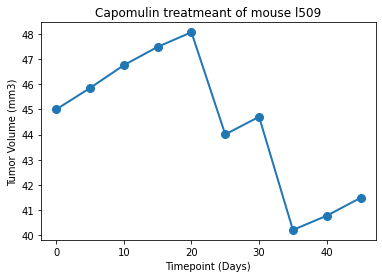

In [30]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin",:]
line_data = capomulin.loc[capomulin["Mouse ID"] == "l509",:]
timepoint = line_data["Timepoint"]
tumor = line_data["Tumor Volume (mm3)"]

plt.plot(timepoint, tumor,linewidth=2, markersize=8,marker="o")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatmeant of mouse l509')
plt.show()

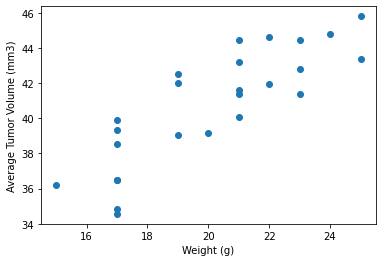

In [14]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

average = capomulin.groupby(['Mouse ID']).mean()
plt.scatter(average['Weight (g)'],average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

In [15]:
# CORRELATION AND REGRESSION

# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation=round(st.pearsonr(average['Weight (g)'], average['Tumor Volume (mm3)'])[0],2)
correlation

0.84

In [16]:
regression=st.linregress(average['Weight (g)'], average['Tumor Volume (mm3)'])
regression

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

The correlation between mouse weight and average tumor volume is 0.84


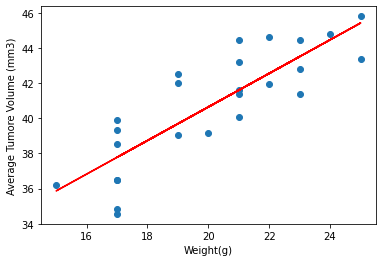

In [17]:
slope = 0.9544396890241045
intercept = 21.552160532685015

y_axis = average['Weight (g)']*slope+intercept
plt.scatter(average['Weight (g)'],average['Tumor Volume (mm3)'])
plt.plot(average['Weight (g)'],y_axis, color = 'red')
plt.title(print(f"The correlation between mouse weight and average tumor volume is {correlation}"))
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
plt.show()